In [1]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle
from keras.utils  import to_categorical
import pickle

In [2]:
def load_rand():
    X=[]
    dir_path=r'D:/dataset/train'
    for sub_dir in tqdm(os.listdir(dir_path)):
        print(sub_dir)
        path_main=os.path.join(dir_path,sub_dir)
        i=0
        for img_name in os.listdir(path_main):
            if i>=6:
                break
            img=cv2.imread(os.path.join(path_main,img_name))
            img=cv2.resize(img,(100,100))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            X.append(img)
            i+=1
    return X

In [3]:
X=load_rand()

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 45.21it/s]

freshapples
freshbanana
freshoranges
rottenapples
rottenbanana
rottenoranges


In [4]:
X=np.array(X)
X.shape

(36, 100, 100, 3)

In [5]:
def show_subpot(X,title=False,Y=None):
    if X.shape[0]==36:
        f, ax= plt.subplots(6,6, figsize=(40,60))
        list_fruits=['freshapples', 'freshbanana', 'freshoranges', 'rottenapples','rottenbanana','rottenoranges']
        for i,img in enumerate(X):
            ax[i//6][i%6].imshow(img, aspect='auto')
            if title==False:
                ax[i//6][i%6].set_title(list_fruits[i//6])
            elif title and Y is not None:
                ax[i//6][i%6].set_title(Y[i])
        plt.show()
    else:
        print('Cannot plot')

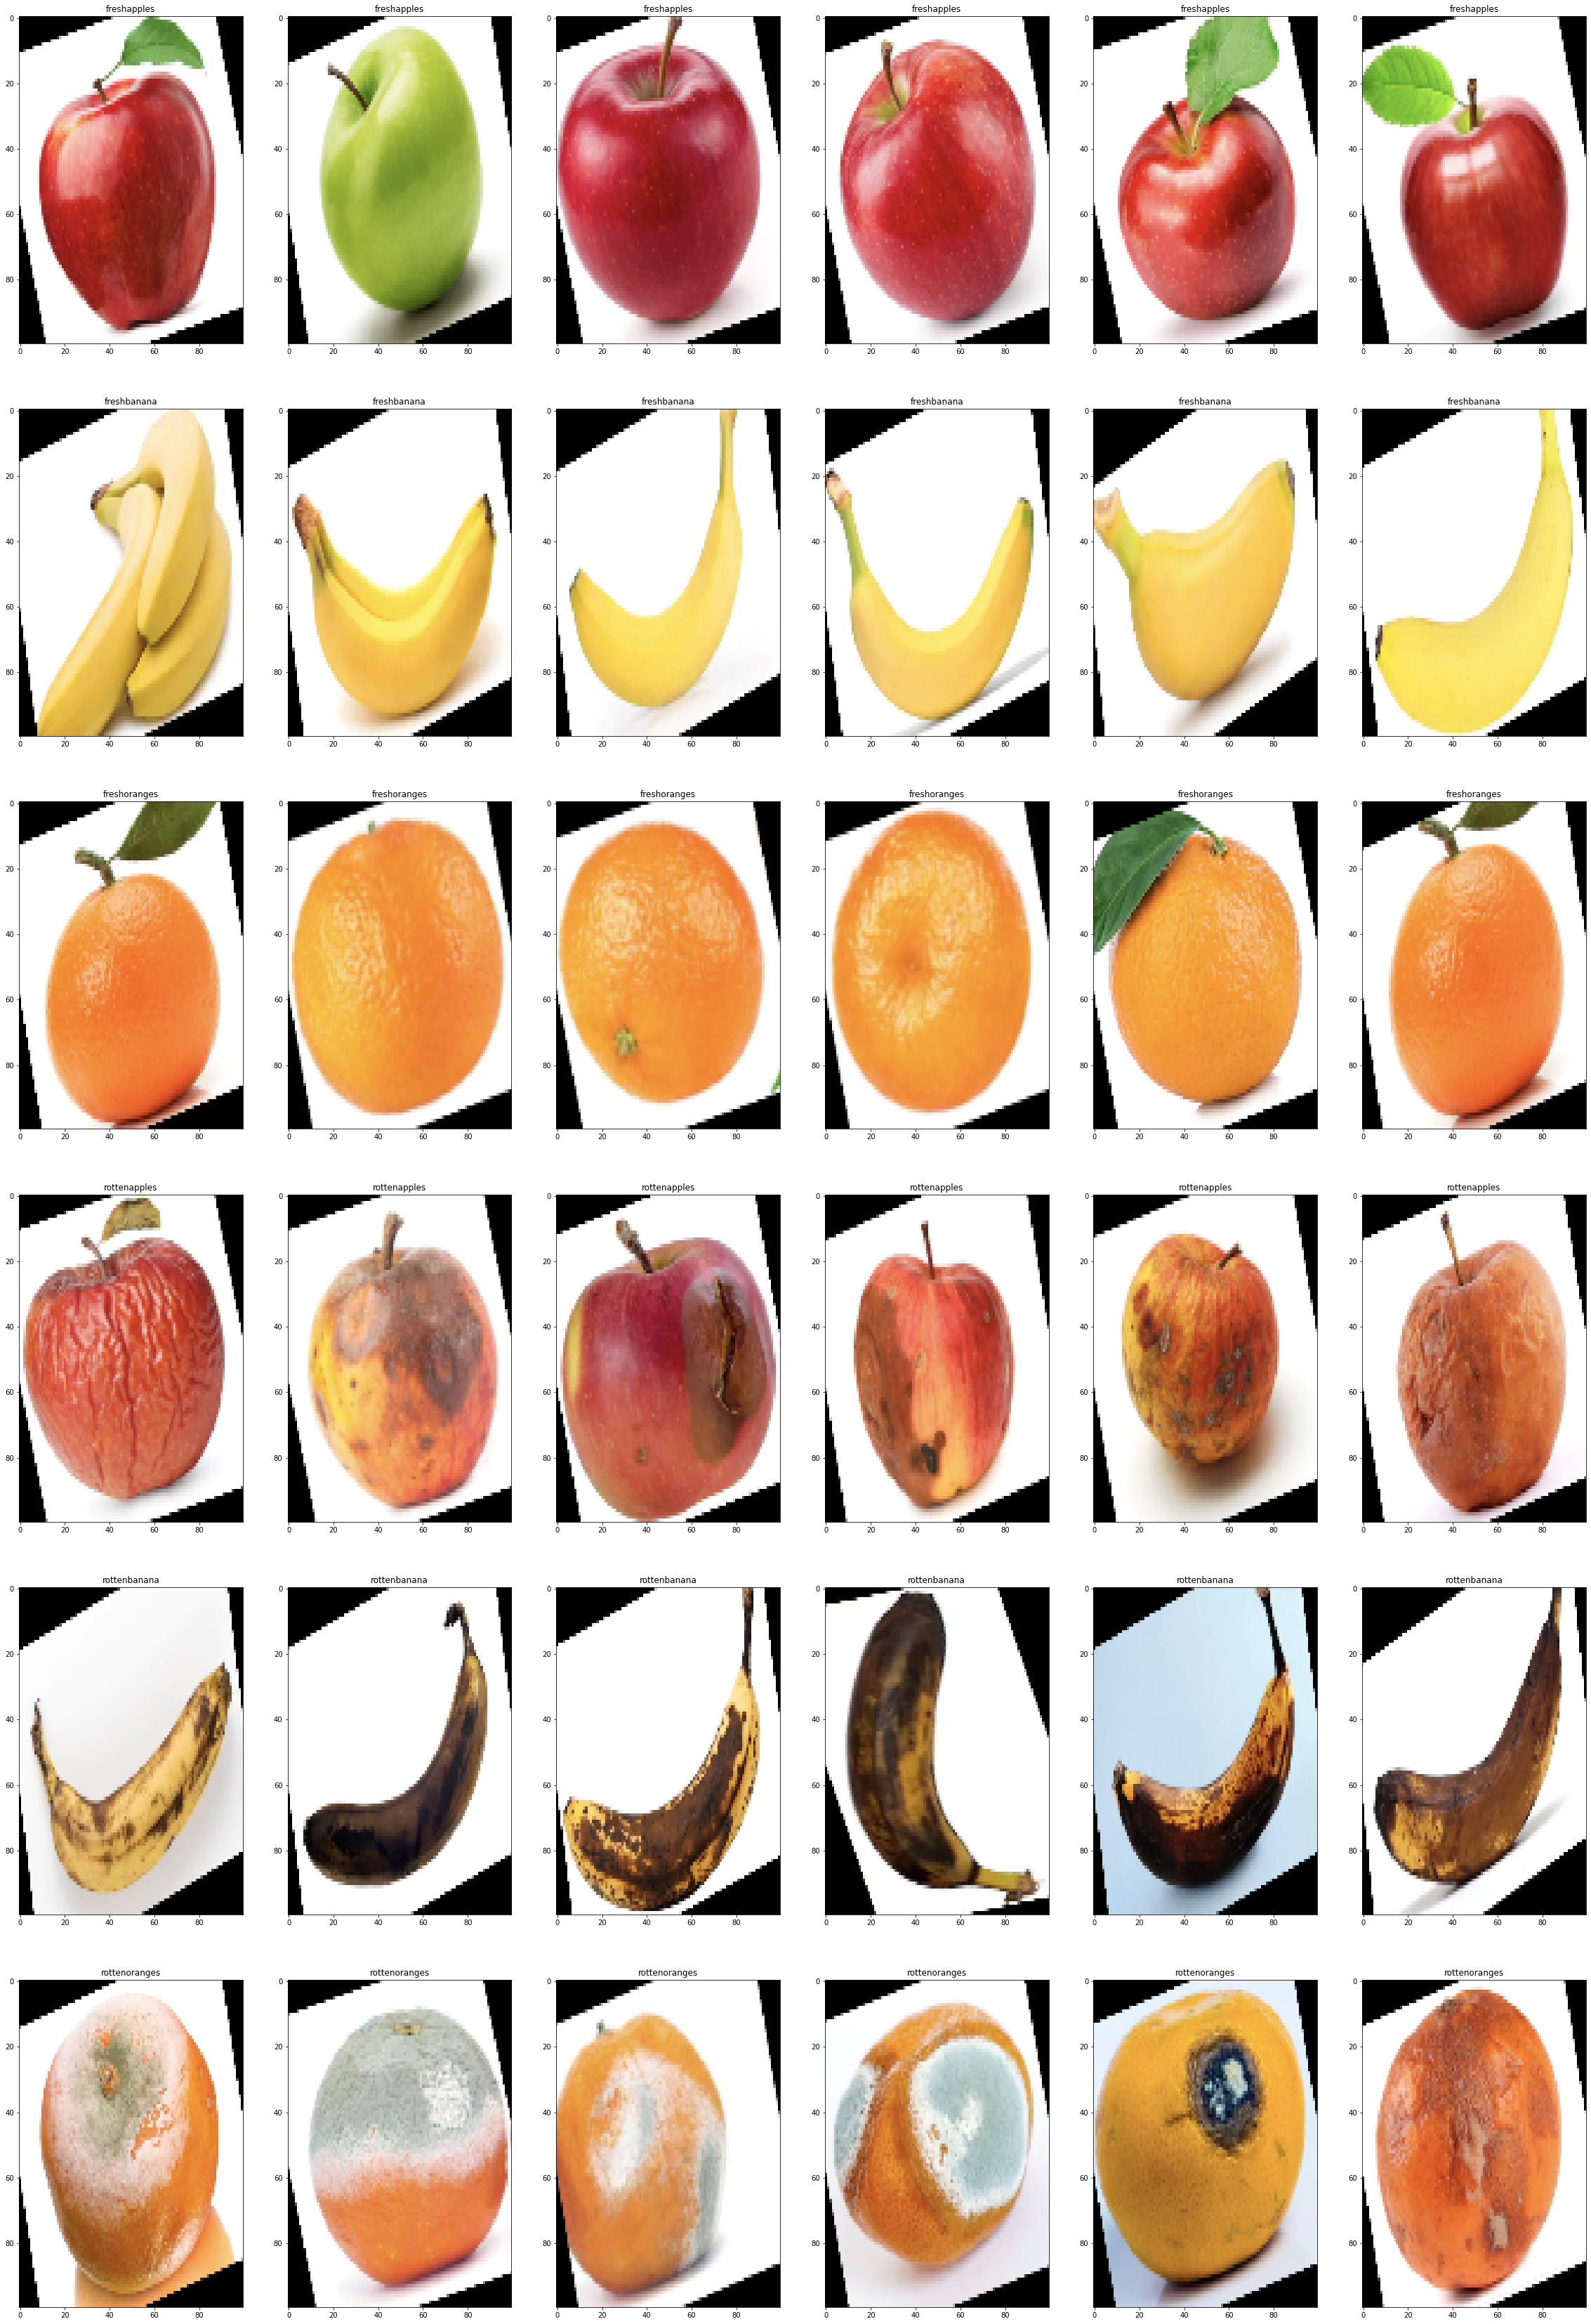

In [6]:
show_subpot(X)

In [7]:
del X

In [8]:
def load_rottenvsfresh():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir(r'D:/dataset/train')):
        if quality[0] in cata:
            path_main=os.path.join(r'D:/dataset/train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        else:
            path_main=os.path.join(r'D:/dataset/train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y

In [9]:
X,Y=load_rottenvsfresh()


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:24<00:00,  4.13s/it]


Shuffling your data.....


100%|███████████████████████████████████████████████████████████████████████| 10901/10901 [00:00<00:00, 1561974.17it/s]


In [10]:
Y=np.array(Y)
X=np.array(X)

In [11]:
y_ser=pd.Series(Y)
y_ser.value_counts()

1    6161
0    4740
dtype: int64

In [12]:
def load_rottenvsfresh_valset():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir(r'D:/dataset/test')):
        if quality[0] in cata:
            path_main=os.path.join(r'D:/dataset/test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        else:
            path_main=os.path.join(r'D:/dataset/test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y            

In [13]:
X_val,Y_val=load_rottenvsfresh_valset()

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.00s/it]


Shuffling your data.....


100%|█████████████████████████████████████████████████████████████████████████| 2698/2698 [00:00<00:00, 1352322.20it/s]


In [14]:
Y_val=np.array(Y_val)
X_val=np.array(X_val)
y_ser=pd.Series(Y_val)
y_ser.value_counts()

1    1534
0    1164
dtype: int64

In [15]:
import keras 
from keras.layers import Dense,Dropout, Conv2D,MaxPooling2D , Activation, Flatten, BatchNormalization, SeparableConv2D
from keras.models import Sequential

In [16]:
model = Sequential()

model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu', input_shape=(100,100,3)))
model.add(BatchNormalization())
model.add(SeparableConv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
# model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

#model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 32)     128       
 ormalization)                                                   
                                                                 
 separable_conv2d (Separable  (None, 100, 100, 32)     1344      
 Conv2D)                                                         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 50, 50, 32)       128       
 hNormalization)                                        

In [18]:
import tensorflow as tf

In [19]:
lr_rate=keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=6, verbose=1, mode='max',
    min_lr=0.00002, cooldown=2)
check_point=tf.keras.callbacks.ModelCheckpoint(
    filepath='D:/dataset/rottenvsfresh.h5', monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='min')

model.compile(loss=keras.losses.binary_crossentropy, optimizer = keras.optimizers.Adam(lr = 0.001), metrics=['accuracy'])

C:\Users\aliha\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [20]:
X=X/255.0
X_val=X_val/255.0

In [21]:
history=model.fit(X,Y,batch_size=20,validation_data=(X_val,Y_val),epochs= 50,
                 callbacks=[check_point])

Epoch 1/50
546/546 [==============================] - ETA: 0s - loss: 0.3928 - accuracy: 0.8656
Epoch 1: val_loss improved from inf to 1.06244, saving model to D:/dataset\rottenvsfresh.h5
546/546 [==============================] - 26s 40ms/step - loss: 0.3928 - accuracy: 0.8656 - val_loss: 1.0624 - val_accuracy: 0.7424
Epoch 2/50
544/546 [============================>.] - ETA: 0s - loss: 0.1945 - accuracy: 0.9240
Epoch 2: val_loss improved from 1.06244 to 0.16097, saving model to D:/dataset\rottenvsfresh.h5
546/546 [==============================] - 23s 43ms/step - loss: 0.1943 - accuracy: 0.9241 - val_loss: 0.1610 - val_accuracy: 0.9440
Epoch 3/50
545/546 [============================>.] - ETA: 0s - loss: 0.1418 - accuracy: 0.9494
Epoch 3: val_loss did not improve from 0.16097
546/546 [==============================] - 21s 38ms/step - loss: 0.1427 - accuracy: 0.9494 - val_loss: 0.2761 - val_accuracy: 0.9288
Epoch 4/50
545/546 [============================>.] - ETA: 0s - loss: 0.1959 -

545/546 [============================>.] - ETA: 0s - loss: 0.0233 - accuracy: 0.9924
Epoch 29: val_loss did not improve from 0.03065
546/546 [==============================] - 33s 60ms/step - loss: 0.0233 - accuracy: 0.9924 - val_loss: 0.0434 - val_accuracy: 0.9907
Epoch 30/50
545/546 [============================>.] - ETA: 0s - loss: 0.0238 - accuracy: 0.9927
Epoch 30: val_loss did not improve from 0.03065
546/546 [==============================] - 21s 38ms/step - loss: 0.0238 - accuracy: 0.9927 - val_loss: 0.0316 - val_accuracy: 0.9870
Epoch 31/50
545/546 [============================>.] - ETA: 0s - loss: 0.0231 - accuracy: 0.9921
Epoch 31: val_loss did not improve from 0.03065
546/546 [==============================] - 20s 37ms/step - loss: 0.0231 - accuracy: 0.9921 - val_loss: 0.0776 - val_accuracy: 0.9800
Epoch 32/50
545/546 [============================>.] - ETA: 0s - loss: 0.0272 - accuracy: 0.9929
Epoch 32: val_loss improved from 0.03065 to 0.01850, saving model to D:/dataset\r

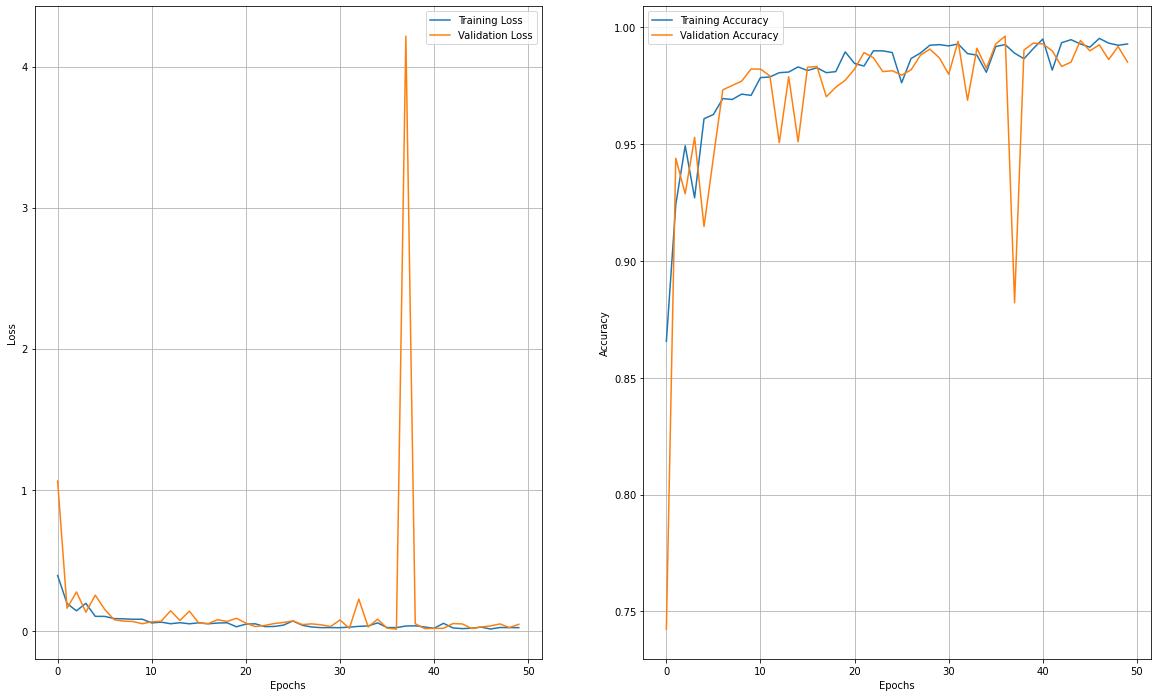

In [22]:
plt.figure(1, figsize = (20, 12))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( history.history["loss"], label = "Training Loss")
plt.plot( history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( history.history["accuracy"], label = "Training Accuracy")
plt.plot( history.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

In [23]:
model.evaluate(X_val,Y_val)

85/85 [==============================] - 2s 17ms/step - loss: 0.0471 - accuracy: 0.9852


[0.047148190438747406, 0.9851741790771484]

In [24]:
model.save('D:/dataset/rottenvsfresh.h5')

In [28]:
from keras.models import Model, load_model

In [29]:
new_model=load_model('D:/dataset/rottenvsfresh.h5')


In [30]:
new_model.evaluate(X_val,Y_val)

85/85 [==============================] - 2s 15ms/step - loss: 0.0471 - accuracy: 0.9852


[0.047148190438747406, 0.9851741790771484]

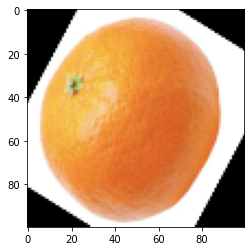

In [31]:
plt.imshow(X_val[0])

In [32]:
new_model.predict(X_val[0].reshape(1,100,100,3))


1/1 [==============================] - 0s 148ms/step


array([[2.6310354e-05]], dtype=float32)

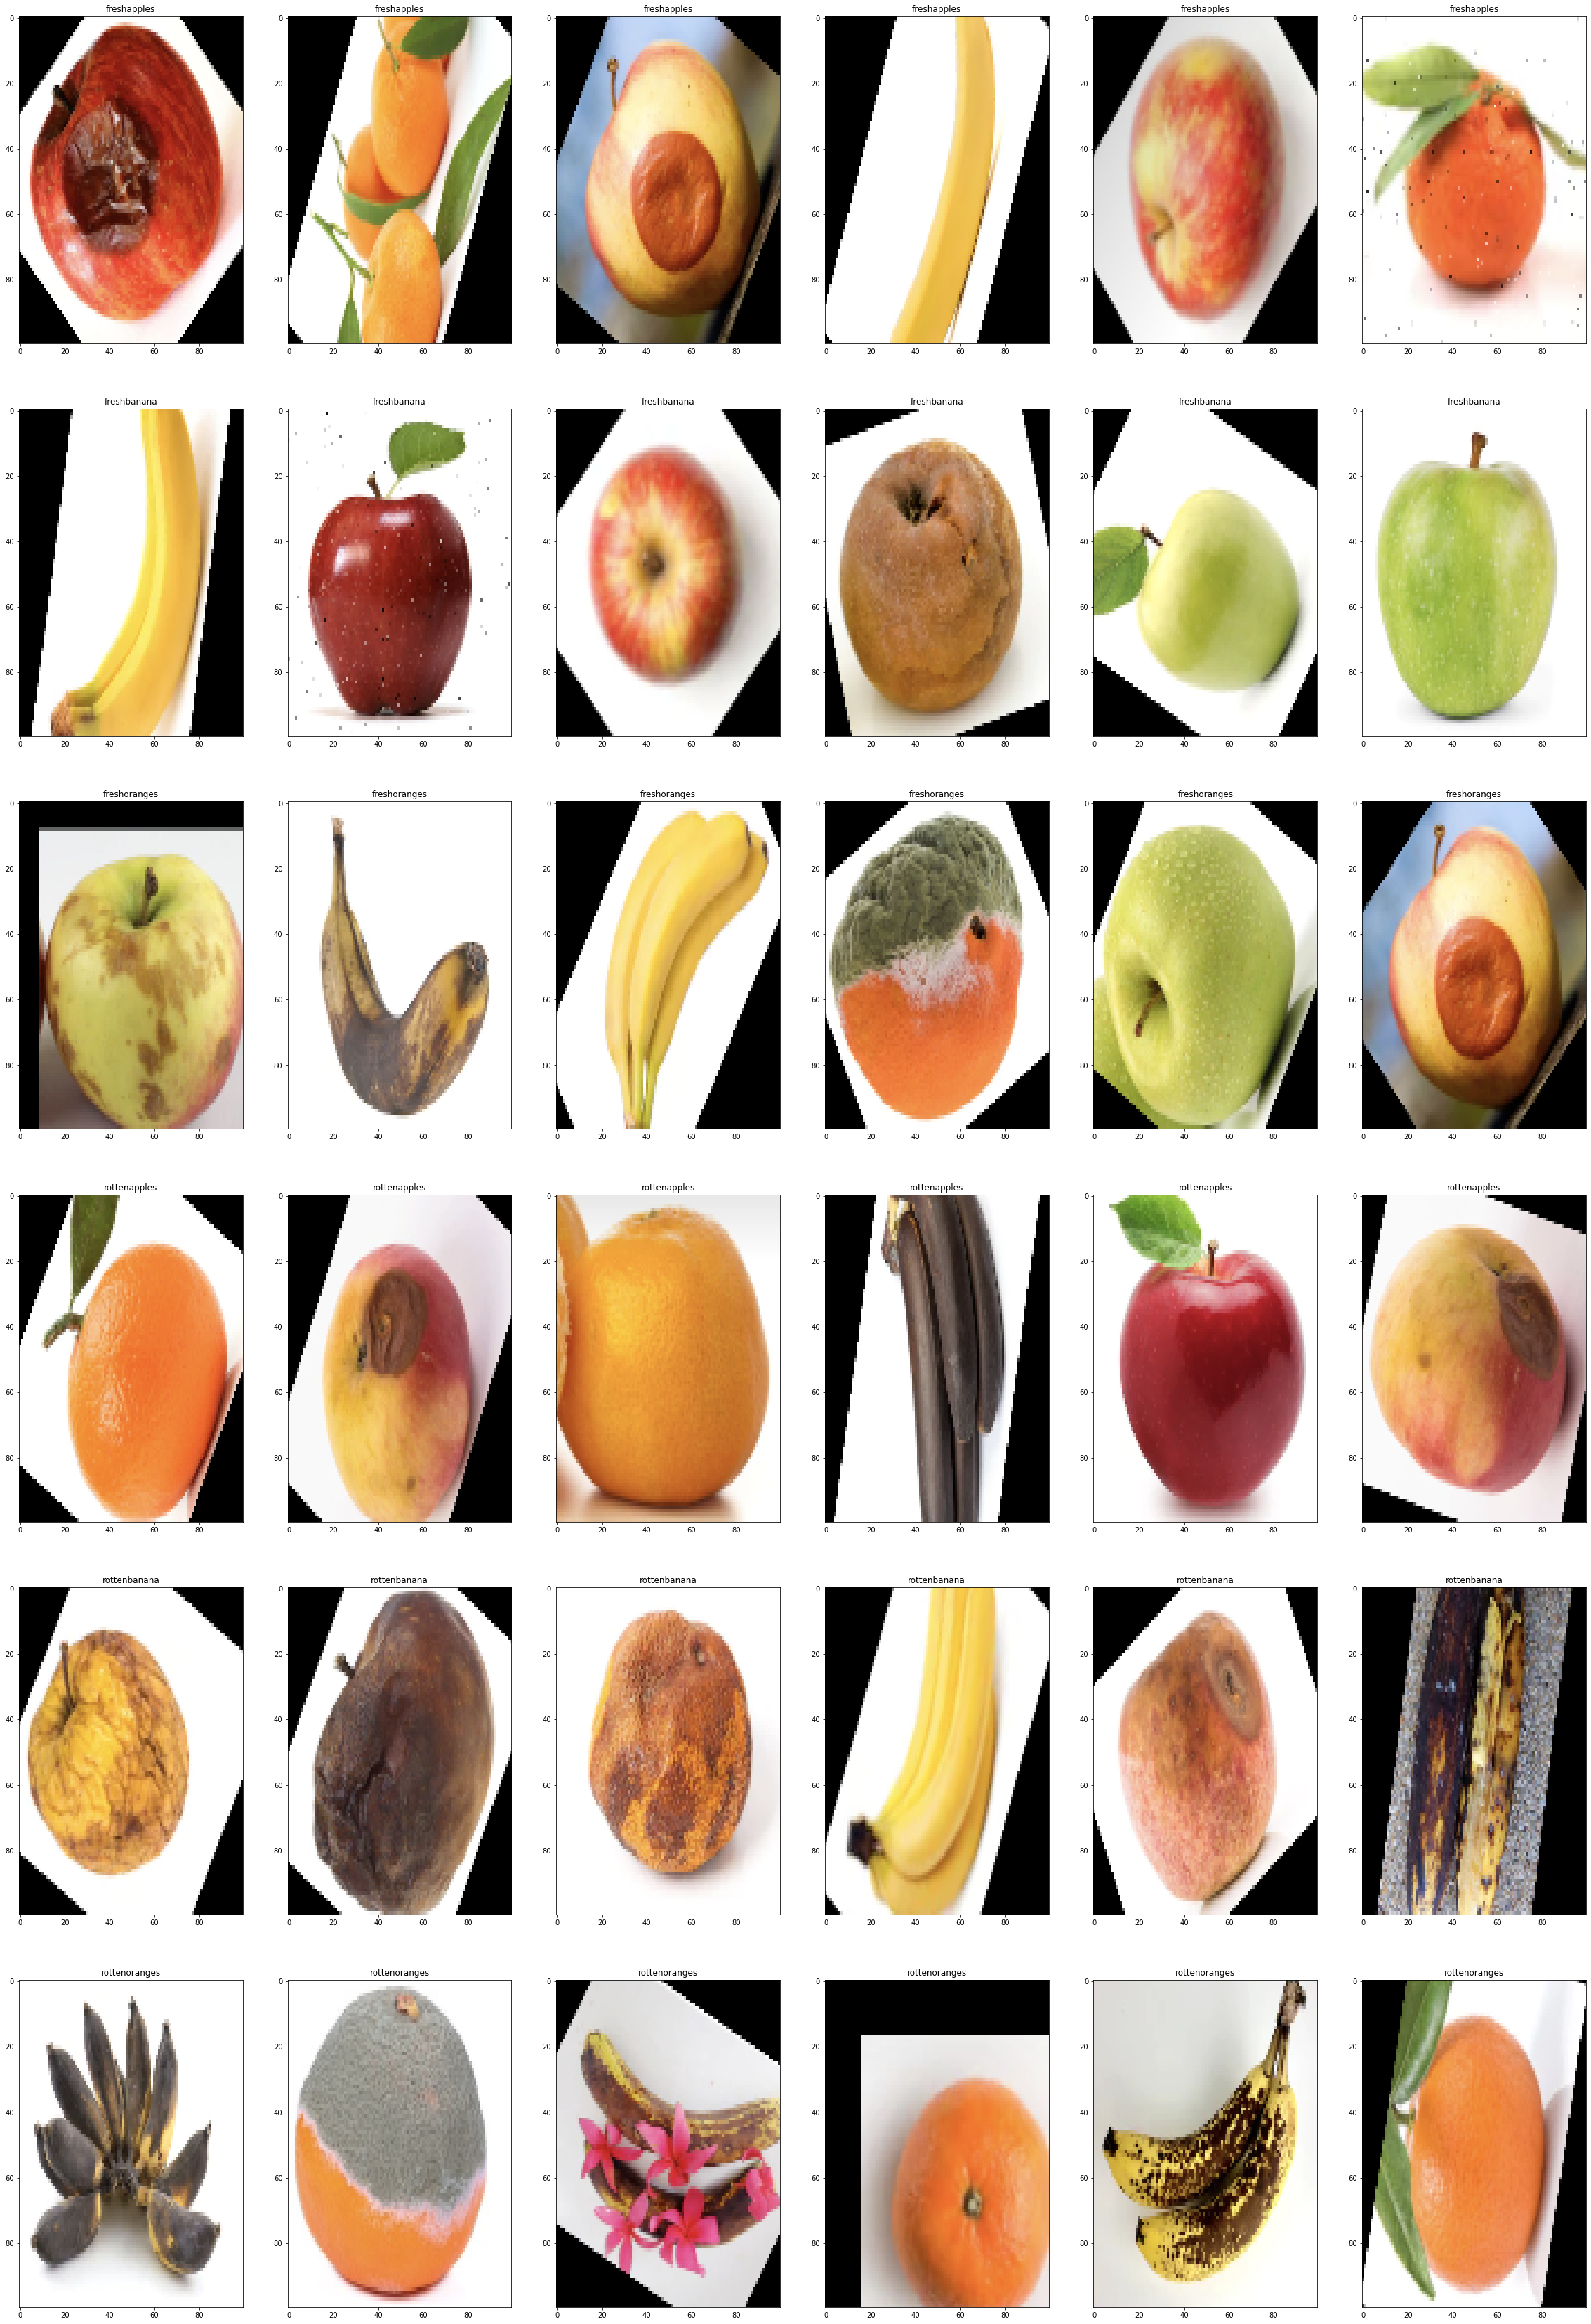

In [33]:
show_subpot(X_val[-36*11:-36*10])

In [34]:
new_model.predict(X_val[:36])

2/2 [==============================] - 0s 373ms/step


array([[2.6310401e-05],
       [5.8290589e-04],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.4865002e-07],
       [9.9999881e-01],
       [1.0000000e+00],
       [4.5812238e-09],
       [3.1103427e-05],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9994802e-01],
       [1.5225811e-10],
       [1.0000000e+00],
       [1.0000000e+00],
       [3.1911203e-04],
       [1.0000000e+00],
       [2.2194457e-04],
       [1.0000000e+00],
       [1.6248563e-24],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.6035950e-13],
       [2.5084200e-06],
       [1.0000000e+00],
       [1.7653072e-08],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [35]:
y_pred = new_model.predict(X_val[-36*11:-36*10])
print(y_pred)
y_pred = np.round(y_pred).astype(int)
y_predFinal = []
for i in y_pred:
    if i[0] == 0:
        y_predFinal.append("Fresh")
    else:
        y_predFinal.append("Rotten")


2/2 [==============================] - 0s 12ms/step
[[1.0000000e+00]
 [8.7960368e-11]
 [9.9999976e-01]
 [7.1623724e-08]
 [6.3543662e-06]
 [8.1207760e-04]
 [1.6433229e-05]
 [1.7246235e-13]
 [8.2926445e-06]
 [1.0000000e+00]
 [1.1780489e-07]
 [2.5946744e-02]
 [9.9999976e-01]
 [1.0000000e+00]
 [8.4461571e-10]
 [1.0000000e+00]
 [3.4674123e-01]
 [1.0000000e+00]
 [5.4365835e-05]
 [1.0000000e+00]
 [5.6454296e-06]
 [1.0000000e+00]
 [8.2965211e-24]
 [9.9999774e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [3.6989275e-04]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [2.4102451e-04]
 [1.0000000e+00]
 [4.6024835e-15]]


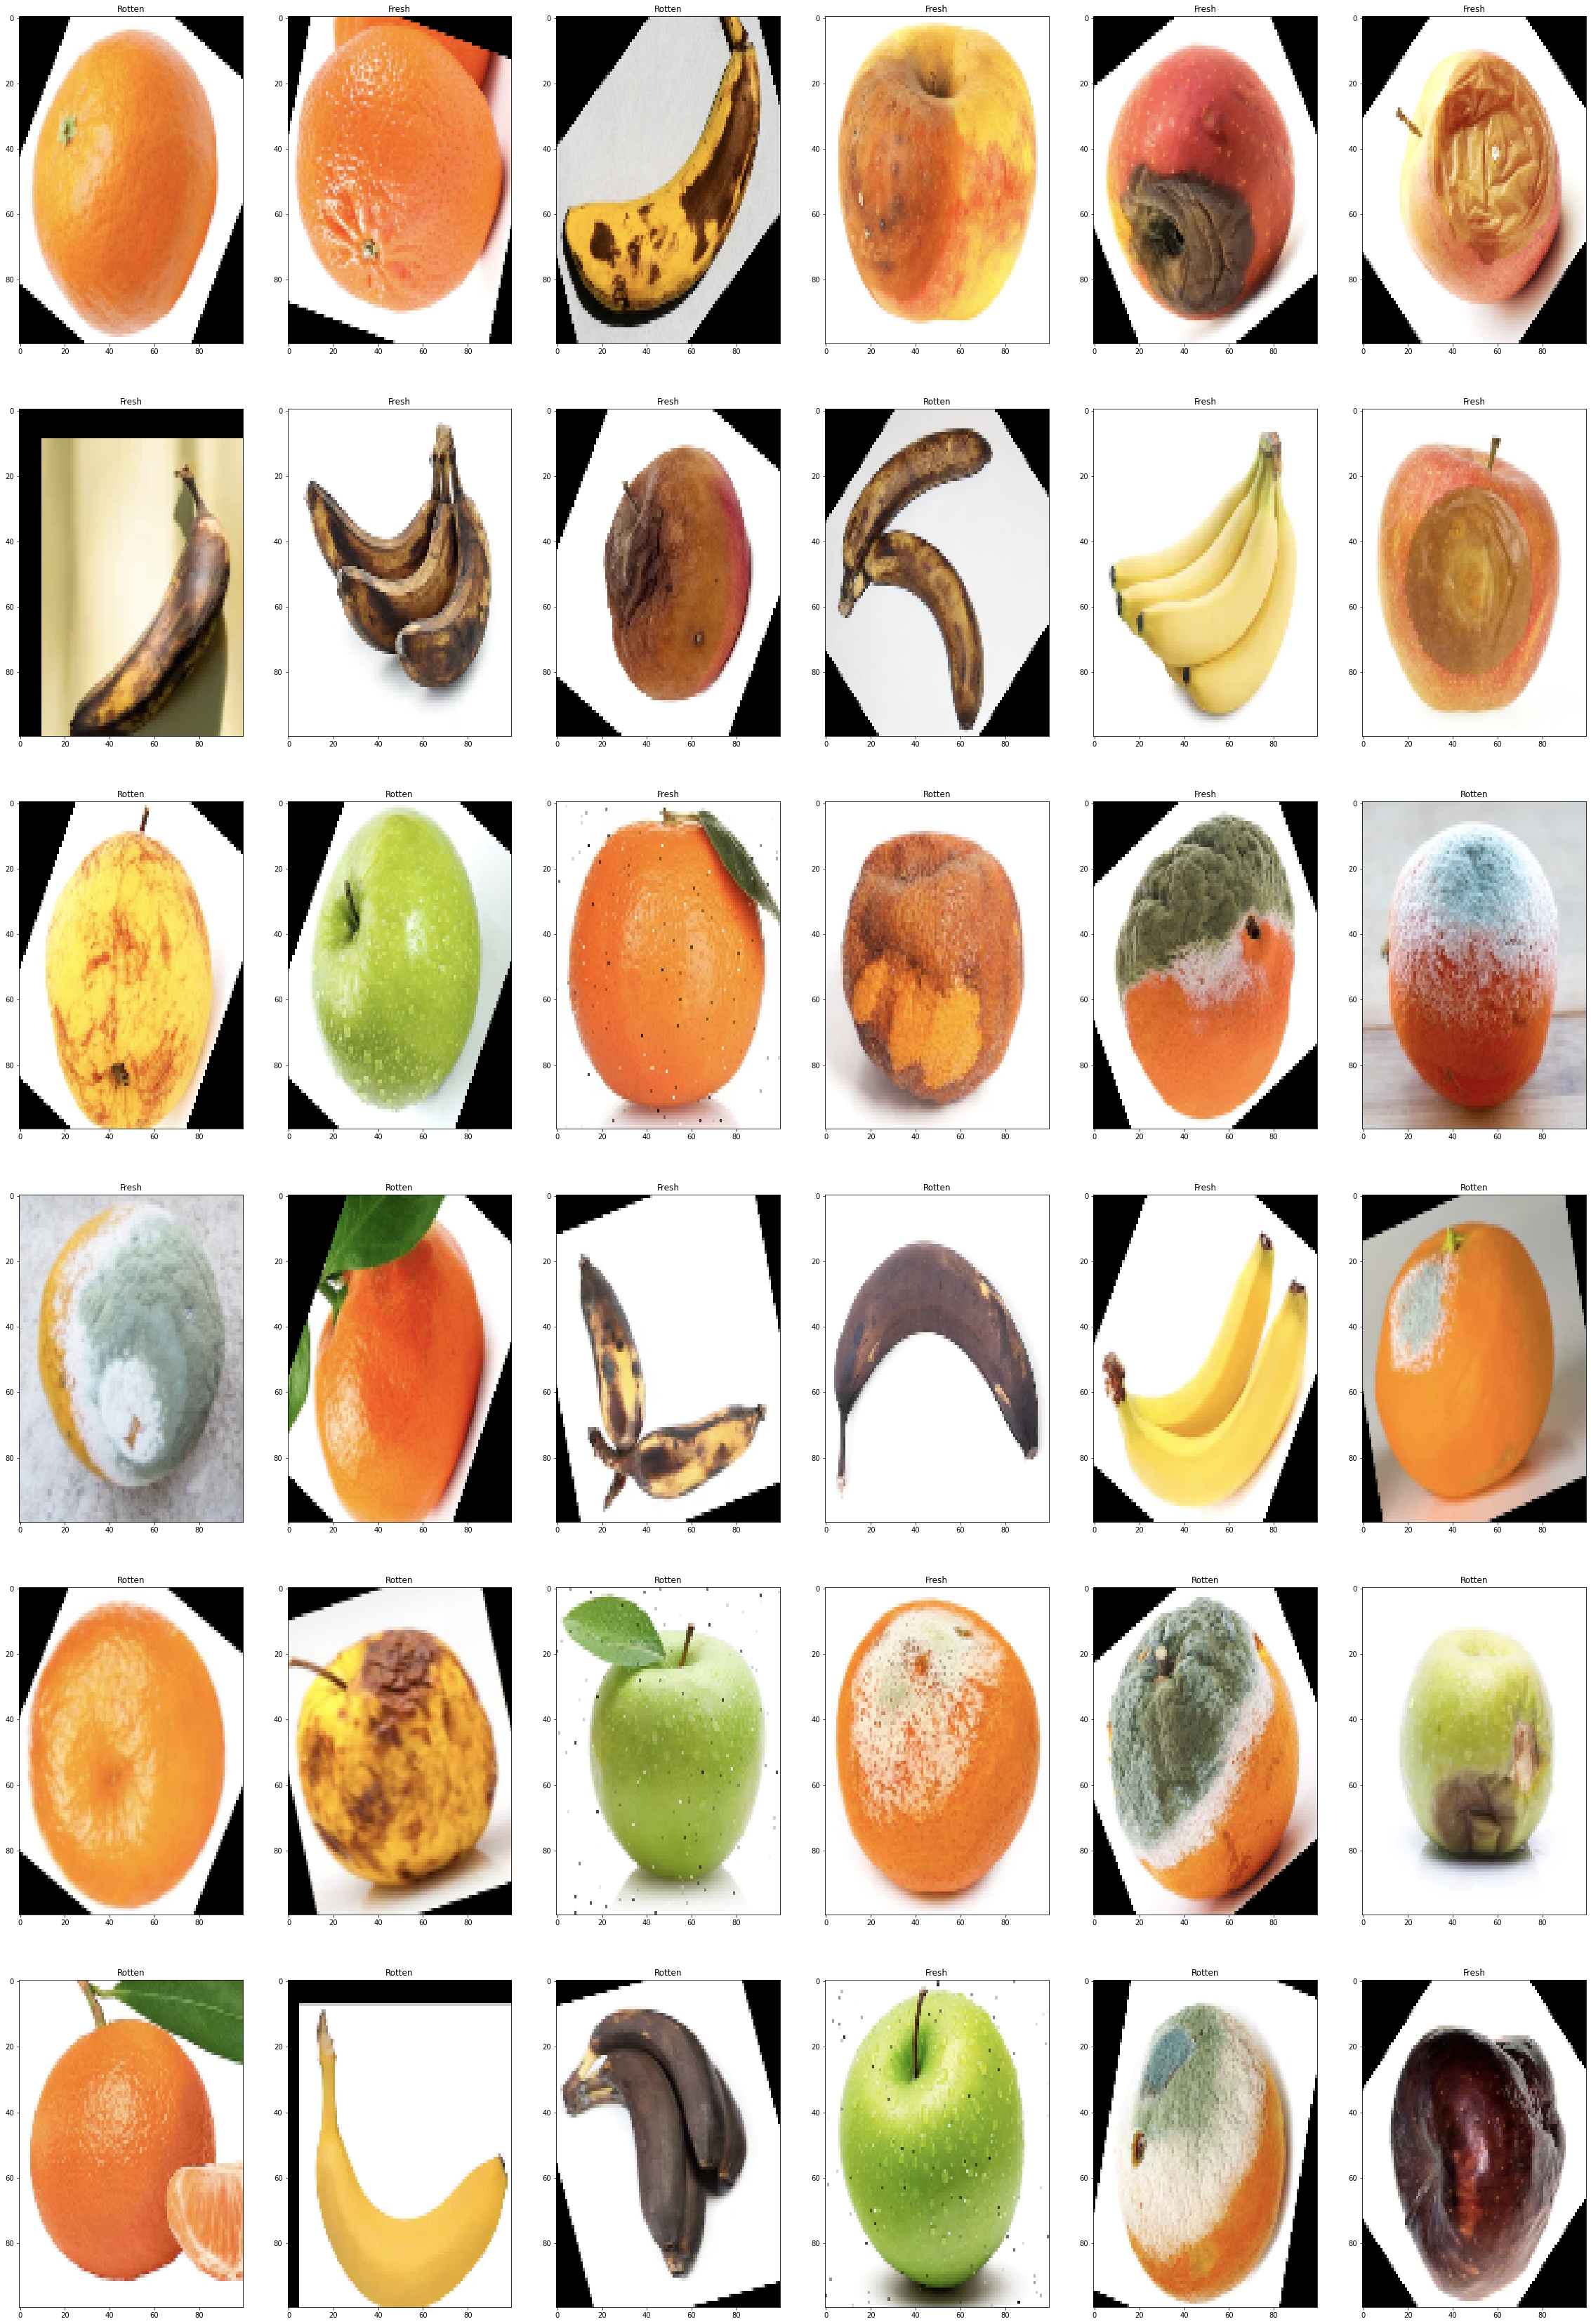

In [36]:
show_subpot(X_val[:36],title=True,Y=y_predFinal)